In [530]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### DATA IMPORTS (SOME)

In [766]:

# General data about Electric vehicles, battery information, range, top speed, etc.
ev_info = pd.read_csv("./datasets/EV_data.csv")

# EV sales (count) by month with information on make and model
ev_sales = pd.read_csv("./datasets/adoption.csv")

# Co2 emissions data per country capita, will be using US
co2 = pd.read_csv("./datasets/world_bank_co2.csv")

#tmeparature change based on NASA giss data
temperature = pd.read_csv("./datasets/temp_change.csv")
# Costs of Gasoline and Electricity
fuel_price = pd.read_csv("./datasets/fuel_price.csv")

#FRED electricity costs city average
electric = pd.read_csv("./datasets/electric.csv")

#FRED general vehicle sales
g_sales = pd.read_csv("./datasets/general_sales.csv")

#FRED Producer Price Index for semicondoctors and chip components
chip = pd.read_csv("./datasets/chip_cost.csv")

# FRED Insurance PPI Auto
insurance = pd.read_csv("./datasets/insurance.csv")

#charging locations
charge = pd.read_csv("./datasets/charging_loc.csv")


### DATA EXPLORATION

In [889]:
ev_info["PriceUSD"] = round(ev_info["PriceEuro"] * 1.13, 0)
ev_match_info = ev_info
ev_match_info.Model = ev_match_info.Model.str.lower()
ev_match_info.Brand = ev_match_info.Brand.str.lower()
ev_match_info["full_name"] = ev_match_info.Brand + ' ' + ev_match_info.Model
chev_bolt = {'Brand':'chevrolet',
             'Model':'bolt ev', 
             'AccelSec':6.5, 
             'TopSpeed_KmH':93,
             'Range_Km':259, 
             'Battery_Pack Kwh': 70.0,
             'Efficiency_WhKm':161,
             'FastCharge_KmH':940,
             'RapidCharge':'Yes',
             'PowerTrain':'AWD',
             'PlugType':'Type 2 CCS', 
             'BodyStyle':'Hatchback',
             'Segment': 'D',
             'Seats' :'5',
             'PriceEuro':0,
             'PriceUSD':31000,
             'full_name':'chevrolet bolt ev'}

ev_match_info = ev_match_info.append(chev_bolt, ignore_index=True)
for i, j in ev_match_info.iterrows():
    if "tesla" in j.full_name:
        if "long" in j.full_name:
            temp = j.full_name.split(" long")
            temp = temp[0]
        if "standard" in j.full_name:
            temp = j.full_name.split(" standard")
            temp = temp[0]
        ev_match_info.loc[i, 'full_name'] = temp
        
    if "bmw i3" in j.full_name:
        temp = j.full_name.split(" 120")
        temp = temp[0] + " (bev + rex)"
        ev_match_info.loc[i, 'full_name'] = temp

 


In [890]:
# data from InsideEVs.com
ev_match_sales = ev_sales[ev_sales["Car Type1"] =="Fully Electric"]
ev_match_sales["date"] = pd.to_datetime(ev_match_sales["Year Month"])
ev_match_sales["CAR MAKE AND MODEL"] = ev_match_sales["CAR MAKE AND MODEL"].str.lower()
ev_match_sales["CAR MAKE"] = ev_match_sales["CAR MAKE"].str.lower()
ev_match_sales["CAR MODEL"] = ev_match_sales["CAR MODEL"].str.lower()
ev_match_sales["full_name"] = ev_match_sales["CAR MAKE AND MODEL"]



In [891]:
test_df = pd.merge(ev_match_sales, ev_info, on="full_name", how="left")


## PROJECT COMPLETION TASKS

### 1) Clean EV data to display monthly counts of sales
**
Table should have at minimum columns: EV sell count (by vehicle type), vehicle information, petrol_consumption, co2 metric tons per capita, electricity costs, gasoline costs
**
### 2) Perform tests on data
- collinearity
- non-linearity
- interactive
- dummy variables
- heteroscedasticity 
- specification test
- conduct serial correlation test (time series)

### 3) Descriptive statistics
- correlation check
- OLS results

### 4) Model Testing with different variables
- improve model from there on out with similar fashion as before
- second and final model (3) all together


## PART 1: DATA CLEANING

In [770]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

ev_info["PriceUSD"] = round(ev_info["PriceEuro"] * 1.13, 0)

ev_sales["Year Month"] = pd.to_datetime(ev_sales["Year Month"])
ev_sales_temp= ev_sales.groupby(ev_sales["Year Month"]).Sales.sum()

ev_sales_monthly = pd.DataFrame()
ev_sales_monthly["date"] = ev_sales_temp.index
ev_sales_monthly["units_sold"] = ev_sales_temp.values
#ev_sales_monthly
ev_sales = ev_sales[ev_sales["Car Type1"] == "Fully Electric"]
ev_tuned = ev_sales.loc[ev_sales.groupby(ev_sales["Year Month"]).Sales.idxmax()]
ev_tuned["CAR MAKE AND MODEL"] = ev_tuned["CAR MAKE AND MODEL"].str.lower()
ev_tuned["CAR MAKE"] = ev_tuned["CAR MAKE"].str.lower()
ev_tuned["CAR MODEL"] = ev_tuned["CAR MODEL"].str.lower()
ev_tuned["date"] = ev_tuned["Year Month"]
ev_tuned.index = ev_tuned.date
ev_tuned
ev_tuned["full_name"] = ev_tuned["CAR MAKE AND MODEL"]
is_tesla = []
for x in ev_tuned["Tesla vs Others"]:
    if 'NON' in x:
        is_tesla.append(0)
    else:
        is_tesla.append(1)
ev_tuned["is_tesla"] = is_tesla
ev_tuned


,Month of Year Month,Car Type1,CAR MAKE,CAR MAKE AND MODEL,CAR MODEL,Month,Reset,Tesla vs Others,Year,Year Month,...,Sales,Sales Non Tesla,Sales Tesla,SalesO,X,Y,Zero Axis,date,full_name,is_tesla
date,,,,,,,,,,,,,,,,,,,,,
2010-12-01,December 2010,Fully Electric,nissan,nissan leaf,leaf,DEC,Reset,NON TESLA,2010,2010-12-01,...,19,19.0,NaN,19,-9.500000,16.454483,0,2010-12-01,nissan leaf,0
2011-01-01,January 2011,Fully Electric,nissan,nissan leaf,leaf,JAN,Reset,NON TESLA,2011,2011-01-01,...,87,87.0,NaN,87,0.000000,87.000000,0,2011-01-01,nissan leaf,0
2011-02-01,February 2011,Fully Electric,nissan,nissan leaf,leaf,FEB,Reset,NON TESLA,2011,2011-02-01,...,67,67.0,NaN,67,33.500000,58.023702,0,2011-02-01,nissan leaf,0
2011-03-01,March 2011,Fully Electric,nissan,nissan leaf,leaf,MAR,Reset,NON TESLA,2011,2011-03-01,...,298,298.0,NaN,298,258.075570,149.000000,0,2011-03-01,nissan leaf,0
2011-04-01,April 2011,Fully Electric,nissan,nissan leaf,leaf,APR,Reset,NON TESLA,2011,2011-04-01,...,573,573.0,NaN,573,573.000000,0.000000,0,2011-04-01,nissan leaf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-01,November 2018,Fully Electric,tesla,tesla model 3,model 3,NOV,Reset,TESLA,2018,2018-11-01,...,18650,NaN,18650.0,18650,-16151.373781,9325.000000,0,2018-11-01,tesla model 3,1
2018-12-01,December 2018,Fully Electric,tesla,tesla model 3,model 3,DEC,Reset,TESLA,2018,2018-12-01,...,25250,NaN,25250.0,25250,-12625.000000,21867.141446,0,2018-12-01,tesla model 3,1
2019-01-01,January 2019,Fully Electric,tesla,tesla model 3,model 3,JAN,Reset,TESLA,2019,2019-01-01,...,6500,NaN,6500.0,6500,0.000000,6500.000000,0,2019-01-01,tesla model 3,1


In [771]:
# Cleaning up fuel Price Data
fuel_price["date"] = fuel_price["Survey Start Date"].astype(str)
fuel_price["date"] = pd.to_datetime(fuel_price['date'], errors='coerce')
fuel_price['date'] = fuel_price['date'].to_numpy().astype('datetime64[M]')

# Gas price
fuel_price["gas_price"] = fuel_price["Gasoline"]
fuel_price["gas_price"] = fuel_price["gas_price"].astype(str)
fuel_price.gas_price = fuel_price.gas_price.apply(lambda x: float(x[1:]) if '$' in x else x)

# Diesel Price
fuel_price["Diesel"] = fuel_price["Diesel"].astype(str)
fuel_price.Diesel = fuel_price.Diesel.apply(lambda x: float(x[1:]) if '$' in x else x)


In [772]:
temperature["f_date"] = temperature["Date"].astype(str)
temperature["f_date"] = pd.to_datetime(temperature['f_date'], errors='coerce')
temperature['f_date'] = temperature['f_date'].to_numpy().astype('datetime64[M]')
temperature = temperature[temperature["Source"] == "GISTEMP"]
#temperature = temperature.drop(["Date"], axis=1)
temperature.index = temperature.f_date

In [773]:
electric.columns = ["date", "electric_kwh_price"]
electric.date = pd.to_datetime(electric.date)
electric.index = electric.date

In [774]:
g_sales.columns = ["date", "general_vehicle_sales"]
g_sales.date = pd.to_datetime(g_sales.date)
g_sales.index = g_sales.date

In [775]:
chip.columns = ["date", "PPI_chip"]
chip.date = pd.to_datetime(chip.date)
chip.index = chip.date

In [776]:
# Co2 data
us_data = co2[co2["Country Code"] == "USA"]
us_data = us_data.drop(["Country Name", "Indicator Name", "Indicator Code", "Country Code"], axis=1)

us_data = us_data.transpose()
us_data.columns = ["co2"]
us_data.index = pd.to_datetime(us_data.index)

In [777]:
insurance.columns = ["date", "PPI_insurance"]
insurance.date = pd.to_datetime(insurance.date)
insurance.index = insurance.date

In [782]:
charge = pd.read_csv("./datasets/charging_loc.csv")
charge.columns = ["date", "EVSE", "Station"]
charge.date = pd.to_datetime(charge.date)
charge.index = charge.date

,date,EVSE,Station
date,,,
2011-01-01,2011-01-01,5070,2100
2012-01-01,2012-01-01,14982,6200
2013-01-01,2013-01-01,19472,8100
2014-01-01,2014-01-01,25602,10712
2015-01-01,2015-01-01,34151,13696
2016-01-01,2016-01-01,45124,17723
2017-01-01,2017-01-01,53117,19792
2018-01-01,2018-01-01,64037,22826
2019-01-01,2019-01-01,85079,26959


In [803]:
# yahoo finance data
tesla_stock = pd.read_csv("./datasets/TSLA.csv")
tesla_stock.Date = pd.to_datetime(tesla_stock.Date)
tesla_stock.index = tesla_stock.Date

In [809]:
# US Department of Energy EV vehicle range (some entries excluded from download)
ev_range = pd.read_csv("./datasets/ev_range.csv")
ev_range.columns = ["date", "range"]
ev_range.date = pd.to_datetime(ev_range.date)
ev_range.index = ev_range.date
ev_range = ev_range.groupby(ev_range["date"]).mean()
ev_range

,range
date,
2011-01-01,76.666667
2012-01-01,105.833333
2013-01-01,95.750000
2014-01-01,95.363636
2015-01-01,99.200000
2016-01-01,110.333333
2017-01-01,140.600000


In [841]:
# MASTERDATAFRAME
EV_DATA = pd.DataFrame()
EV_DATA["date"] = ev_sales_monthly.date

EV_DATA["units_sold"] = ev_sales_monthly.units_sold

EV_DATA["gas_price"] = fuel_price.gas_price
EV_DATA["diesil_price"] = fuel_price.Diesel
EV_DATA.index = EV_DATA["date"].values

EV_DATA["co2"] = us_data.co2
EV_DATA["co2"] = round(EV_DATA["co2"].interpolate(method='quadratic', inplace=False),3)
EV_DATA["charge_port"] = charge.EVSE
EV_DATA["charge_port"] = round(EV_DATA["charge_port"].interpolate(method='quadratic', inplace=False),0)
EV_DATA["Station_port"] = charge.Station
EV_DATA["Station_port"] = round(EV_DATA["Station_port"].interpolate(method='quadratic', inplace=False),0)
EV_DATA["tesla_stock"] = round(tesla_stock.Open,2)
EV_DATA["avg_max_range"] = ev_range.range
EV_DATA["avg_max_range"] = round(EV_DATA["avg_max_range"].interpolate(method='quadratic', inplace=False),2)

EV_DATA["electric_price"] = electric["electric_kwh_price"]
EV_DATA["other_car_sales"] = round(g_sales["general_vehicle_sales"],0)
EV_DATA["temp_change"] = temperature.Mean
EV_DATA["PPI_chip"] = chip.PPI_chip
EV_DATA["PPI_insurance"] = insurance.PPI_insurance
EV_DATA["is_tesla"] = ev_tuned["is_tesla"]
EV_DATA["top_model"] = ev_tuned["CAR MAKE AND MODEL"]


EV_DATA = EV_DATA.drop(["date"], axis=1)
EV_DATA = EV_DATA.dropna()

EV_DATA

,units_sold,gas_price,diesil_price,co2,charge_port,Station_port,tesla_stock,avg_max_range,electric_price,other_car_sales,temp_change,PPI_chip,PPI_insurance,is_tesla,top_model
2011-01-01,408,1.54,1.46,16.599,5070.0,2100.0,5.37,76.67,0.125,818.0,0.51,61.9,110.9,0,nissan leaf
2011-02-01,348,1.68,1.37,16.474,6169.0,2554.0,4.86,81.00,0.125,988.0,0.53,62.2,110.8,0,nissan leaf
2011-03-01,906,1.27,1.19,16.369,7121.0,2947.0,4.81,84.62,0.127,1251.0,0.64,62.1,110.8,0,nissan leaf
2011-04-01,1066,1.11,1.04,16.263,8130.0,3364.0,5.49,88.29,0.127,1150.0,0.65,62.0,110.9,0,nissan leaf
2011-05-01,1623,1.40,1.19,16.170,9060.0,3748.0,5.52,91.52,0.129,1056.0,0.53,62.0,110.6,0,nissan leaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-01,14592,2.68,2.74,14.885,49840.0,18980.0,47.10,125.39,0.139,1507.0,0.98,57.4,111.6,1,tesla model s
2016-09-01,17224,2.59,2.71,14.856,50462.0,19121.0,41.80,128.18,0.139,1431.0,0.87,57.1,111.6,1,tesla model s
2016-10-01,11007,1.91,2.33,14.835,51085.0,19269.0,42.46,131.02,0.134,1368.0,0.89,56.9,111.6,0,nissan leaf
2016-11-01,13237,2.22,2.20,14.819,51749.0,19433.0,39.61,134.10,0.131,1371.0,0.93,56.9,111.6,0,nissan leaf


In [913]:
round(EV_DATA.describe(),2)

,units_sold,gas_price,diesil_price,co2,charge_port,Station_port,tesla_stock,avg_max_range,electric_price,other_car_sales,temp_change,PPI_chip,PPI_insurance,is_tesla
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,7826.57,2.60,2.58,15.70,27788.14,11144.76,27.51,102.23,0.13,1306.17,0.75,59.12,110.21,0.35
std,4644.09,0.71,0.75,0.45,13437.63,5051.04,18.70,11.20,0.00,196.69,0.19,1.34,0.74,0.48
min,348.00,1.11,1.04,14.81,5070.00,2100.00,4.81,76.67,0.12,818.00,0.46,56.90,108.70,0.00
25%,3752.50,2.16,2.19,15.35,17375.75,7197.25,6.20,95.53,0.13,1149.75,0.62,58.38,109.70,0.00
50%,8423.00,2.62,2.62,15.81,25296.00,10594.50,35.63,99.54,0.13,1315.50,0.74,58.80,110.40,0.00
75%,10628.50,3.05,3.14,16.06,38939.75,15487.25,44.73,105.71,0.14,1459.50,0.82,59.62,110.50,1.00
max,24785.00,3.91,4.22,16.60,52412.00,19604.00,55.10,137.22,0.14,1683.00,1.35,62.20,113.70,1.00


## STEP 2
### Perform tests on data
- collinearity
- non-linearity
- interactive
- dummy variables
- heteroscedasticity 
- specification test [While modeling]
- conduct serial correlation test (time series)

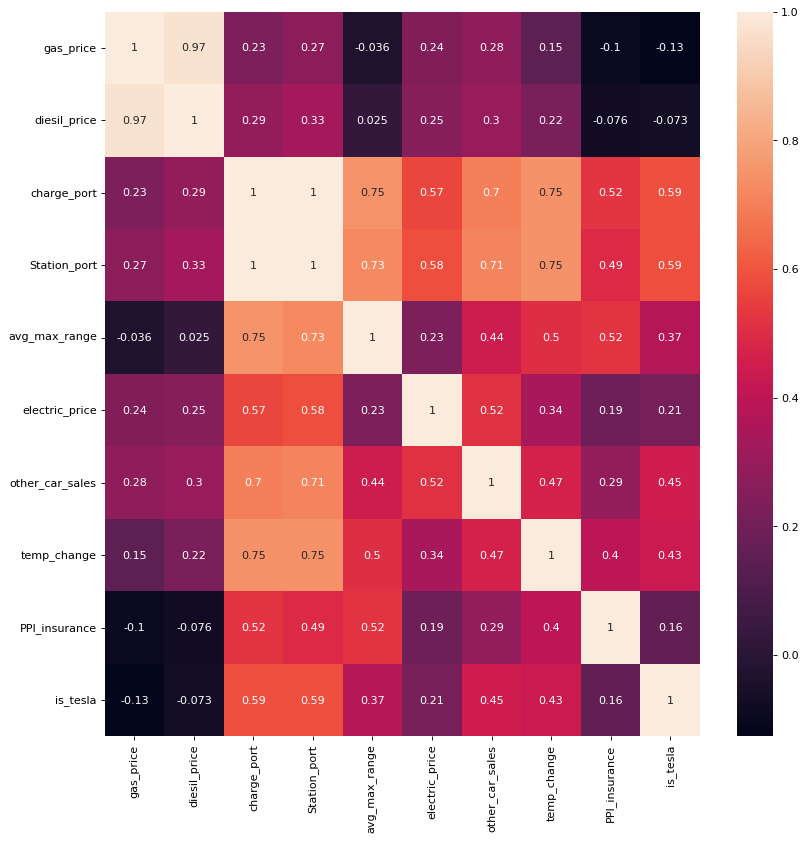

In [914]:
# colinearity
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)
y = EV_DATA["units_sold"]
#X = EV_DATA[['gas_price', 'diesil_price', 'co2', 'charge_port', 'Station_port', 'tesla_stock', 'avg_max_range', 'electric_price', 'other_car_sales', 'temp_change', 'PPI_chip',	'PPI_insurance','is_tesla']]
X = EV_DATA[['gas_price', 'diesil_price', 'charge_port', 'Station_port', 'avg_max_range', 'electric_price', 'other_car_sales', 'temp_change', 'PPI_insurance','is_tesla']]
corrMatrix = X.corr()
corrMatrix = X.corr(method="pearson")
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [876]:

import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('units_sold ~ co2 + gas_price + diesil_price +temp_change + Station_port + avg_max_range + electric_price + other_car_sales + PPI_chip + PPI_insurance + is_tesla', data=EV_DATA).fit()

#view model summary
print(fit.summary())
print(fit)


                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     70.91
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.74e-30
Time:                        22:27:58   Log-Likelihood:                -614.57
No. Observations:                  72   AIC:                             1253.
Df Residuals:                      60   BIC:                             1280.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.094e+05   5.94e+04     

In [877]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(fit.resid)

1.4168276123250043

#### SERIAL CORRELATION TEST

Since one of the assumptions of linear regression is to have no correlation between residuals and have to be independent. The closer to 0 the test statistic is the more evidence of positive serial correlation there is and vice versa with the value of 4. According to our model and doing the durbin_watson test statistic is 1.416, within the range of 1.3 and 2.5, which in the case we would consider autocorrelation to be non problematic in the regression model.

#### HETEROSCEDACITY

The formal definition of heteroscedacity is when the variance of a dependent variable varies, in otherwords unequal scattering of residuals, complicating analysis. To test this we will perform a Breusch-Pagan test.
In regression analysis , heteroscedasticity means a situation in which the variance of the dependent variable varies across the data. Heteroscedasticity complicates analysis because many methods in regression analysis are based on an assumption of equal variance. Since our p-value corresponding with the model is 0.079 and the f-value being 1. we can conclude that there is no heteroskedacity present because we fail to reject the null hypothesis that homoscedacity is present.

In [915]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit3.resid, fit3.model.exog)

lzip(names,test)

[('Lagrange multiplier statistic', 15.442527487051107),
 ('p-value', 0.07947588946414422),
 ('f-value', 1.880951380872817),
 ('f p-value', 0.07154361621292242)]

#### DUMMY AND INTERACTIVE VARIABLES


The only dummy variable used in this will be whether or not the EV of the month in terms of sales with a Tesla or a different brand car. The thought behind the inclusion of this variable was because Tesla is known as a publicly hyped company, it is primarily there to check if there were continuous hyped months or to determine if it was all just Tesla based EV data.

For the interactive terms it is assumed that some of them will depend on each other. There might be a big change in final model as I feel that variables like gas_price, diesel, price will influence each other as the charge_port and station_port variables will be heavily correlated to the sales of the cars itself or tesla_stock. However, since PPI_chip is the producer index for chip manufacturing and electronics, it will be deterministic of such things as charging ports, I will add an interaction term for that. and since we know the temperature_change which its celsius above global norms, it is dependent on co2 greenhouse gasses. Thus, an interaction term for that is necessary as well.

### PART 3 AND 4

### MODEL 2

In [902]:
#fit regression model
fit2 = smf.ols('units_sold ~ co2 + gas_price + temp_change + charge_port + co2*temp_change + avg_max_range + electric_price + other_car_sales + PPI_chip + PPI_insurance + is_tesla', data=EV_DATA).fit()

#view model summary
print(fit2.summary())
print(fit2)

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     73.88
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.21e-30
Time:                        13:48:50   Log-Likelihood:                -613.20
No. Observations:                  72   AIC:                             1250.
Df Residuals:                      60   BIC:                             1278.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.222e+05   6.11e+04     

### MODEL 3

In [903]:
#fit regression model
fit3 = smf.ols('units_sold ~ co2 + gas_price +charge_port + avg_max_range + electric_price + other_car_sales + PPI_chip + PPI_insurance + is_tesla', data=EV_DATA).fit()
#view model summary
print(fit3.summary())
print(fit3)

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     87.68
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           7.65e-32
Time:                        13:49:41   Log-Likelihood:                -615.28
No. Observations:                  72   AIC:                             1251.
Df Residuals:                      62   BIC:                             1273.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.752e+05   5.46e+04     

In [911]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit3.resid, fit3.model.exog)

lzip(names,test)

[('Lagrange multiplier statistic', 15.442527487051107),
 ('p-value', 0.07947588946414422),
 ('f-value', 1.880951380872817),
 ('f p-value', 0.07154361621292242)]

In [909]:
fit4 = smf.ols('units_sold ~ co2 + gas_price +charge_port + avg_max_range + electric_price ', data=EV_DATA).fit()
#view model summary
print(fit4.summary())
print(fit4)

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     62.64
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           9.99e-24
Time:                        14:00:15   Log-Likelihood:                -646.64
No. Observations:                  72   AIC:                             1305.
Df Residuals:                      66   BIC:                             1319.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.515e+05   4.72e+04     -5.

In [910]:
from stargazer.stargazer import Stargazer

star_view = Stargazer([fit,fit2,fit3,fit4])
star_view.significant_digits(2)
star_view